<div class="alert alert-block alert-success">
    <b><center>CONVOLUTON NEURAL NETWORK</center></b>
    <b><center>MNIST 데이터로 DNN 구현해 보기</center></b>
</div>

# Configure Learning Environment

In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
import rspy as rsp
rsp.setSystemWarning(off=True)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
from ipywidgets import interact
import tensorflow as tf
from tensorflow.keras import utils, layers, models, losses

In [3]:
np.set_printoptions(linewidth=200, precision=2)
sns.set_style("whitegrid")
tf.__version__

'2.0.0'

# Prepare Data

In [4]:
DATA_LENGTH = 50
DATA_WINDOW = 3

In [5]:
src_time = np.linspace(0, 40, DATA_LENGTH)
src_data = np.sin(src_time/5) * np.cos(50 * src_time/100)

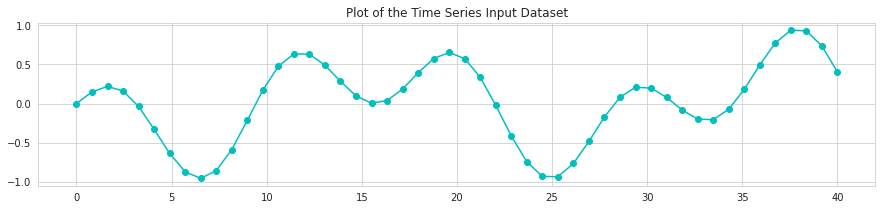

In [6]:
plt.figure(figsize=(15, 3), frameon=False)
plt.plot(src_time, src_data, 'co-')
plt.title("Plot of the Time Series Input Dataset")
plt.show()

# Many To One : Sequence To Value

## Prepare Data

In [7]:
@interact(sequence=(0,46))
def explorationSV(sequence=0):
    plt.figure(figsize=(15, 3), frameon=False)
    plt.plot(src_time, src_data, 'c-', label="original")
    plt.plot(src_time[sequence:sequence+3], src_data[sequence:sequence+3], 'bo-', label="sequence data")
    plt.plot(src_time[sequence+3:sequence+3+1], src_data[sequence+3:sequence+3+1], 'ro-', label="sequence data")
    plt.title("Plot of the Time Series Input Dataset")
    plt.show()

interactive(children=(IntSlider(value=0, description='sequence', max=46), Output()), _dom_classes=('widget-int…

In [8]:
svData, svLabel = rsp.genSequence(src_data, 3, 1)
svData.shape, svLabel.shape

((47, 3, 1), (47, 1, 1))

In [9]:
# rsp.showMulti(src_data.reshape(-1, 1), svData, svLabel)

## Generate Model

In [10]:
svModel = models.Sequential([
    layers.Input([DATA_WINDOW, 1]),
    layers.SimpleRNN(10),
    layers.Dense(1)
])
svModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


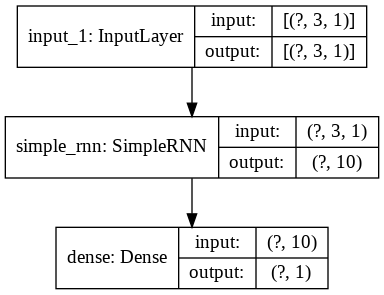

In [11]:
utils.plot_model(svModel, 'model.png', show_shapes=True)

In [12]:
svModel.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)

## Training

In [13]:
svHistory = svModel.fit(
    svData, svLabel,
    epochs=100,
    verbose=0
)

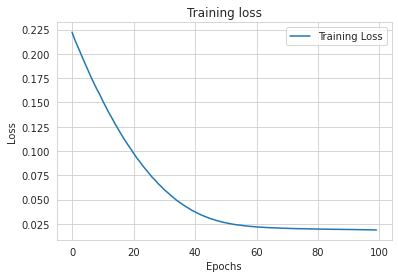

In [14]:
loss = svHistory.history["loss"]
epochs = range(0, len(loss))

plt.plot(epochs, loss, label="Training Loss")
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluate

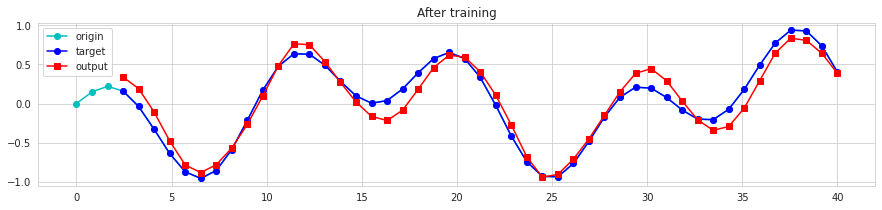

In [15]:
plt.figure(figsize=(15, 3), frameon=False)
plt.plot(src_time, src_data, 'co-', label="origin")
plt.plot(src_time[DATA_WINDOW:], src_data[DATA_WINDOW:], 'bo-', label="target")
plt.plot(src_time[DATA_WINDOW:], svModel.predict(svData[:]), 'rs-', label="output")

plt.legend()
plt.title("After training")
plt.show()

# Many To Many : Sequence To Sequence

## Prepare Data

In [16]:
@interact(sequence=(0,44))
def explorationSS(sequence=0):
    plt.figure(figsize=(15, 3), frameon=False)
    plt.plot(src_time, src_data, 'c-', label="original")
    plt.plot(src_time[sequence:sequence+3], src_data[sequence:sequence+3], 'bo-', label="sequence data")
    plt.plot(src_time[sequence+3:sequence+3+3], src_data[sequence+3:sequence+3+3], 'ro-', label="sequence data")
    plt.title("Plot of the Time Series Input Dataset")
    plt.show()

interactive(children=(IntSlider(value=0, description='sequence', max=44), Output()), _dom_classes=('widget-int…

In [17]:
ssData, ssLabel = rsp.genSequence(src_data, 3, 3)
ssData.shape, ssLabel.shape

((45, 3, 1), (45, 3, 1))

In [18]:
# rsp.showMulti(src_data.reshape(-1, 1), ssData, ssLabel)

## Generate Model

In [19]:
ssModel = models.Sequential([
    layers.Input([DATA_WINDOW, 1]),
    layers.SimpleRNN(10, return_sequences=True),
    layers.TimeDistributed(layers.Dense(1))
])
ssModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 3, 10)             120       
_________________________________________________________________
time_distributed (TimeDistri (None, 3, 1)              11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


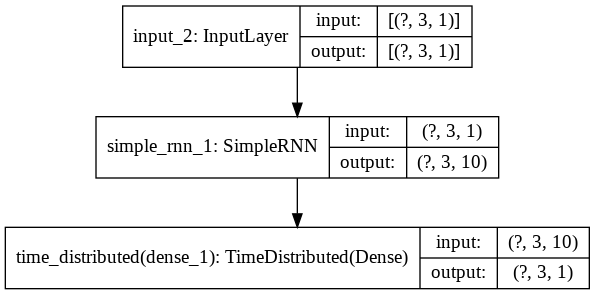

In [20]:
utils.plot_model(ssModel, 'model.png', show_shapes=True)

In [21]:
ssModel.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)

## Training

In [22]:
ssHistory = ssModel.fit(
    ssData, ssLabel,
    epochs=100,
    verbose=0
)

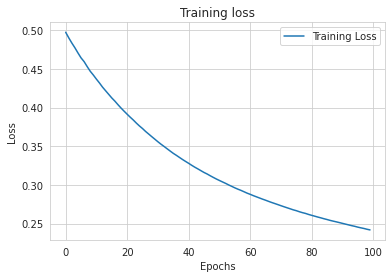

In [23]:
loss = ssHistory.history["loss"]
epochs = range(0, len(loss))

plt.plot(epochs, loss, label="Training Loss")
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluate

In [24]:
ssPredicted = ssModel.predict(ssData).reshape((-1, 3))

In [25]:
@interact(sequence=(0,44))
def explorationSS(sequence=0):
    plt.figure(figsize=(15, 3), frameon=False)
    plt.plot(src_time, src_data, 'c-', label="original")
    plt.plot(src_time[sequence:sequence+3], src_data[sequence:sequence+3], 'bo-', label="sequence data")
    plt.plot(src_time[sequence+3:sequence+3+3], ssPredicted[sequence], 'ro-', label="sequence data")
    plt.title("Plot of the Time Series Input Dataset")
    plt.show()

interactive(children=(IntSlider(value=0, description='sequence', max=44), Output()), _dom_classes=('widget-int…